In [1]:
#Atomic Quantum information Processing Tool (AQIPT) - Analysis module

# Author(s): Manuel Morgado. Universite de Strasbourg. Laboratory of Exotic Quantum Matter - CESQ
# Contributor(s): 
# Created: 2023-03-30
# Last update: 2023-05-30


######################################################################################################################################################################################################
### Loading libs
######################################################################################################################################################################################################

import os, time, sys

os.chdir('C:\\Users\\EQM\\Desktop\\AQiPT_vNewPC_20230525\\AQiPT_vLaptop\\')
sys.path.append("C:\\Users\\EQM\\Desktop\\AQiPT_vNewPC_20230525\\AQiPT_vLaptop\\")
print('Changing directory to: ', os.getcwd())

from AQiPT import AQiPTcore as aqipt
from AQiPT.modules.control import AQiPTcontrol as control
from AQiPT.modules.emulator import AQiPTemulator as emulator
from AQiPT.modules.kernel import AQiPTkernel as kernel
from AQiPT.modules.directory import AQiPTdirectory as dirPath
from AQiPT.modules.analysis import AQiPTanalysis as analyzer

from AQiPT.depository.APIs.API import * 

from AQiPT.hardware.drivers.AQiPTrd import drivers
import AQiPT.hardware.drivers.AQiPTvd as vdrivers


Changing directory to:  C:\Users\EQM\Desktop\AQiPT_vNewPC_20230525\AQiPT_vLaptop
2023-05-30 15:09:00,200 - qm - INFO     - Starting session: 0cd80fbe-7b27-4d02-9f0e-54b23d63b515


INFO:qm:Starting session: 0cd80fbe-7b27-4d02-9f0e-54b23d63b515


# Testing random adding to ```DataManager```

In [2]:
dmanager = analyzer.DataManager(aqipt.directory.data_depository_dir, 'Andor testing')

In [3]:
for group in dmanager.RAW_data.keys() :
    print (group)

Dataset_raw_2023-05-30_14h22m


In [4]:
for group in dmanager.RAW_data.keys() :
    print (group)
    for dataset in dmanager.RAW_data[group]:
        print(dataset, type(dmanager.RAW_data[group][dataset]))

Dataset_raw_2023-05-30_14h22m
AQiPT objects <class 'h5py._hl.group.Group'>
Array <class 'h5py._hl.group.Group'>
Image <class 'h5py._hl.group.Group'>
Table <class 'h5py._hl.group.Group'>
Text <class 'h5py._hl.group.Group'>


In [7]:
dmanager.RAW_data["Dataset_raw_2023-05-30_14h22m"]['Image']['Image']

<HDF5 dataset "Image": shape (20,), type "<f8">

In [5]:
dmanager.add_RAW_data(new_data = np.zeros(20), 
                      group_label = "Dataset_raw_2023-05-30_14h22m",
                      subgroup_label = 'Image',
                      data_label = 'Image');

New data added!


# Testing with Andor camera

In [2]:
andor_dm = analyzer.DataManager(aqipt.directory.data_depository_dir, 'Andor testing')

In [6]:
for group in andor_dm.RAW_data.keys() :
    print (group)
    for dataset in andor_dm.RAW_data[group]:
        print(dataset, type(andor_dm.RAW_data[group][dataset]))

Dataset_raw_2023-05-30_15h09m
AQiPT objects <class 'h5py._hl.group.Group'>
Array <class 'h5py._hl.group.Group'>
Image <class 'h5py._hl.group.Group'>
Table <class 'h5py._hl.group.Group'>
Text <class 'h5py._hl.group.Group'>


In [3]:
camera_params={'FanMode': 2, #0: full, 1: low, 2: off
                                  'AcquisitionMode': 3, #1:single scan, #2:accumulate, 3: kinetics, 4: fast kinetics, 5: run till abort
                                  'TriggerMode': 0, #0: internal, 1: external, 6: external start, 10: software trigger
                                  'ReadMode': 4, #0: full vertical binning, 1:multi-track, 2: random track, 3: sinlge track, 4: image
                                  'ExposureTime': 0.01784,
                                  'NumberAccumulations': 1,
                                  'NumberKinetics': 1,
                                  'KineticCycleTime': 0.02460,
                                  'VSSpeed': 4,
                                  'VSAmplitude': 0,
                                  'HSSpeed': [0,0],
                                  'PreAmpGain': 2,
                                  'ImageParams': {'hbin':1, 
                                                  'vbin':1, 
                                                  'hstart':1, 
                                                  'hend':512, 
                                                  'vstart':1,
                                                  'vend':512}}


ixon897 = drivers._daq_dev.andor();
ixon897.Configure(args=camera_params);

image= [];
ixon897.StartAcquisition();
time.sleep(0.4) ;
ixon897.GetAcquiredData(image);
image= np.array(image);
image= image.reshape((ixon897.width, ixon897.height));
ixon897.ShutDown();


In [8]:
andor_dm.add_RAW_data(new_data = image, 
                      group_label = "Dataset_raw_2023-05-30_15h09m",
                      subgroup_label = 'Image',
                      data_label = 'Raw image 1');

New data added!


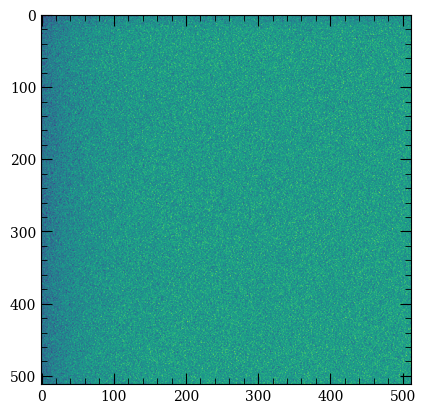

In [16]:
import matplotlib.pyplot as plt 
plt.imshow(np.array(andor_dm.RAW_data["Dataset_raw_2023-05-30_15h09m"]['Image']['Raw image 1']))

---

# Random stuff with ```.hdf5```

In [ ]:
import h5py

arr = np.random.randn(1000)

with h5py.File('RAW_data.hdf5', 'w-') as f:
    f.create_group('Rabi Osc Study')
    dset = f.create_dataset("default", data=arr)

In [ ]:
os.getcwd()

In [ ]:
gf = h5py.File('RAW_data.hdf5', 'w')

In [ ]:
dir(gf)
gf.keys()

In [5]:
np.array(dmanager.dmanager.add_RAW_data['default_data_2023-05-30_12h03m']['Dataset_0'])

array([0, 1, 2, 3, 4])

In [4]:
np.array(dmanager.RAW_data['New2_raw'])

array([], dtype=float64)

In [7]:
dmanager.add_RAW_data("Images","New2_raw", np.zeros(20))

In [7]:
np.zeros(20)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [24]:
dmanager.RAW_data['New2_raw'].create_dataset("here", data=0)

<HDF5 dataset "here": shape (), type "<i4">

In [20]:
if "Image" in [group for group in dmanager.RAW_data.keys()]:
    print('here')

In [26]:
dmanager.RAW_data['New2_raw']['here']

<HDF5 dataset "here": shape (), type "<i4">